In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [65]:
# Load the dataset
file_path = 'Data_Scientists_data.csv'
data = pd.read_csv(file_path)

In [66]:
# Display the first few rows of the dataset
data.head()

,ID,Pay,Perf,EstHap,Stay
0,1,33000,6,7,1
1,2,25000,6,7,1
2,3,16000,5,6,1
3,4,17000,7,7,1
4,5,28000,7,7,1


# Data Exploration

In [67]:
# Summary statistics of the dataset
summary_statistics = data.describe()
print(summary_statistics)

               ID            Pay        Perf      EstHap        Stay
count  500.000000     500.000000  500.000000  500.000000  500.000000
mean   250.500000   23602.000000    6.052000    6.440000    0.918000
std    144.481833   13519.806446    1.446887    0.984041    0.281842
min      1.000000   10000.000000    2.000000    4.000000    0.000000
25%    125.750000   19000.000000    5.000000    6.000000    1.000000
50%    250.500000   22000.000000    6.000000    6.000000    1.000000
75%    375.250000   27000.000000    7.000000    7.000000    1.000000
max    500.000000  295000.000000   10.000000   11.000000    2.000000


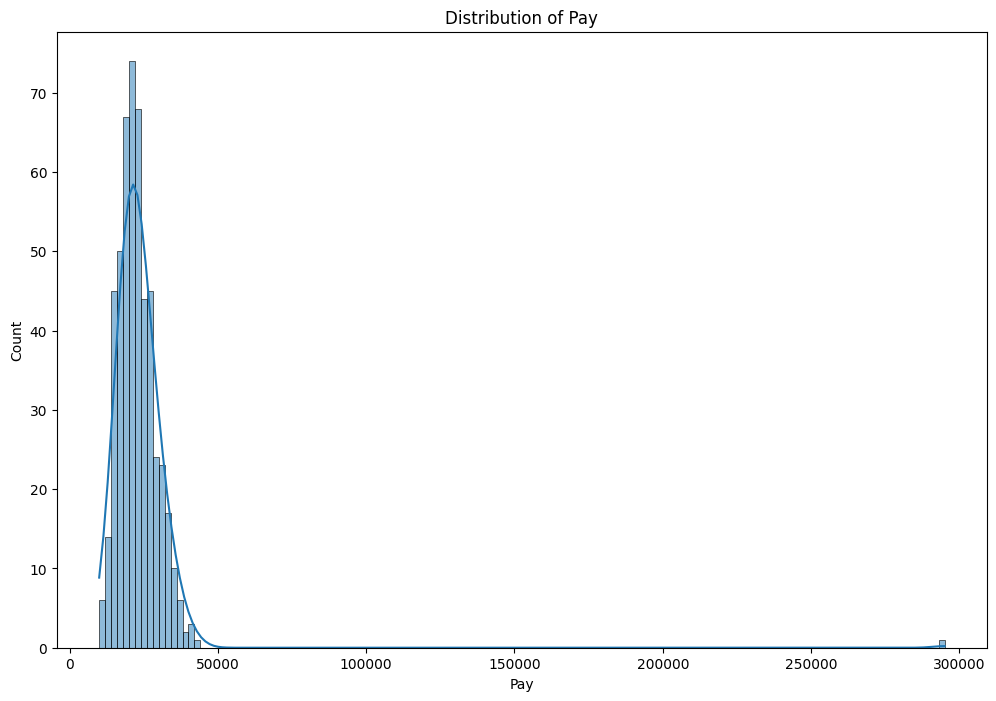

In [68]:
# Visualizing distributions of numerical variables
plt.figure(figsize=(12, 8))
sns.histplot(data['Pay'], kde=True)
plt.title('Distribution of Pay')
plt.show()

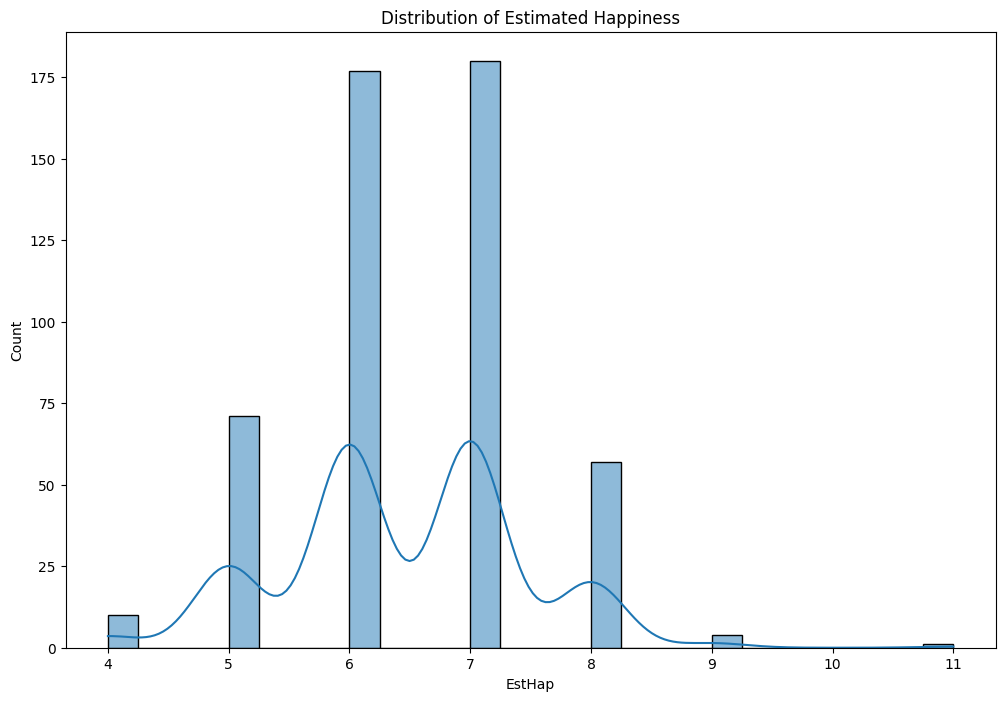

In [69]:
plt.figure(figsize=(12, 8))
sns.histplot(data['EstHap'], kde=True)
plt.title('Distribution of Estimated Happiness')
plt.show()

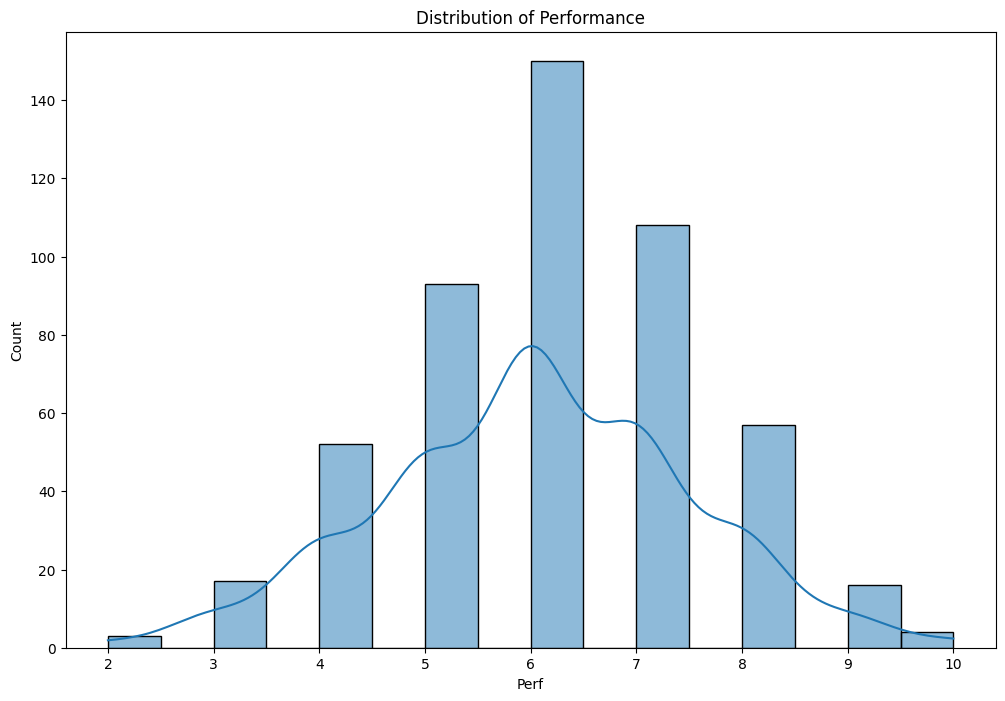

In [70]:
plt.figure(figsize=(12, 8))
sns.histplot(data['Perf'], kde=True)
plt.title('Distribution of Performance')
plt.show()

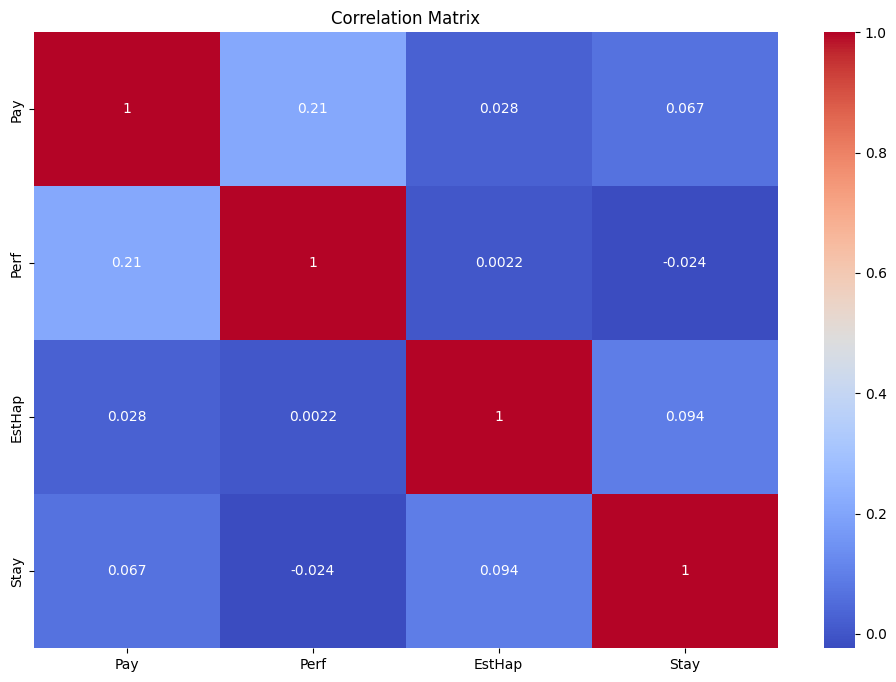

In [71]:
# Checking correlations (excluding 'ID' column)
correlations = data.drop(columns=['ID']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

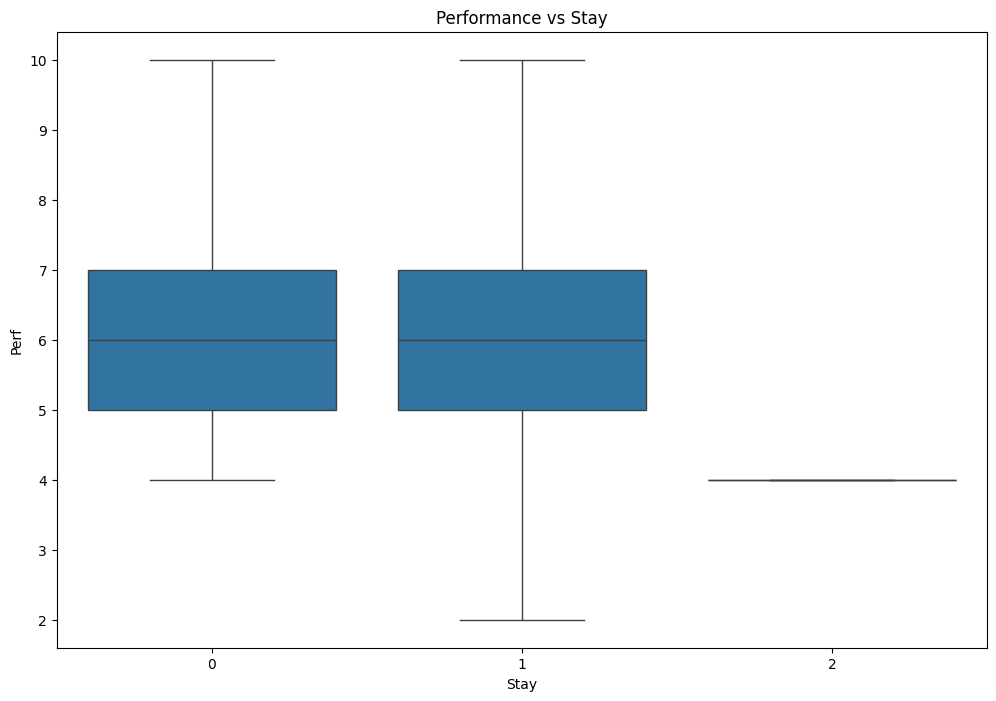

In [72]:
# Visualizing the relationship between Performance and Stay
plt.figure(figsize=(12, 8))
sns.boxplot(x='Stay', y='Perf', data=data)
plt.title('Performance vs Stay')
plt.show()

# Variable Selection and Engineering

In [73]:
id_148 = data[data['ID'] == 148]
print(id_148)

      ID    Pay  Perf  EstHap  Stay
147  148  24000     4       7     2


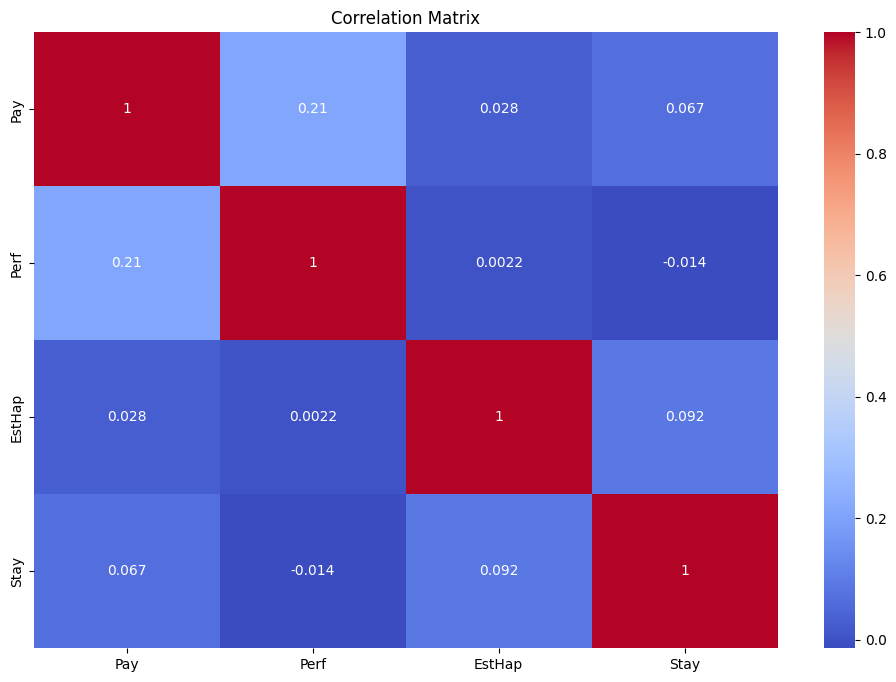

In [74]:
# Correct the Stay column values to be binary (0 and 1) and recheck the correlations
data['Stay'] = data['Stay'].replace(2, 1)
correlations = data.drop(columns=['ID']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [75]:
id_148 = data[data['ID'] == 148]
print(id_148)

      ID    Pay  Perf  EstHap  Stay
147  148  24000     4       7     1


In [76]:
# Encoding the target variable
data['Stay'] = data['Stay'].astype(int)

In [77]:
# Splitting the data into features and target (excluding 'ID' column)
X = data[['Pay', 'EstHap', 'Perf']]
y = data['Stay']

In [78]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [79]:
# Splitting the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Model Fitting and Validation

In [80]:
# Training the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [81]:
# Predicting on the validation set
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Tuning hyperparameters (if needed) - For simplicity, we assume default parameters

In [82]:
# Final model evaluation on the test set
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred, zero_division=0)

In [83]:
# Output the results
print("Validation Accuracy: ", val_accuracy)
print("Test Accuracy: ", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Validation Accuracy:  0.9333333333333333
Test Accuracy:  0.9333333333333333
Confusion Matrix:
 [[ 0  5]
 [ 0 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.93      1.00      0.97        70

    accuracy                           0.93        75
   macro avg       0.47      0.50      0.48        75
weighted avg       0.87      0.93      0.90        75

